# Compartmental models

## Introduction

Here we introduce the features of compartmental models which pygom can handle.

A compartmental model represents transport of material between different states.
Common in epi do be humans between different disease states, but can be transport of molecules in chemistry or money in economics.

We introduce increaseing complexity.

How to solve them and define in pygom we leave until after htis intro.

### Transitions between states

In the simplest compartmental model, things go from one state to another.

For example, SIR is defined by 2 events.

- Infection takes an S to an I
- Recovery takes an I to an R

We must supplement these reactions with the rate at which they occur to fully specify the dynamics of the system.

Convention to graphically represent is boxes with arrows annotated with the rate.
Arrow is interpreted as 1 going to another.

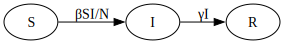

In [2]:
from graphviz import Digraph

dot = Digraph()

dot.body.extend(['rankdir=LR'])

states=['S', 'I', 'R']

for s in states:
    dot.node(s)

dot.edge('S', 'I', label='&beta;SI/N')
dot.edge('I', 'R', label='&gamma;I')

dot

### Transitions into and out of the system

It is not complicated to extend to transitions which are not between states, but take someone out.

This could appear in the SIR model through births and deaths.

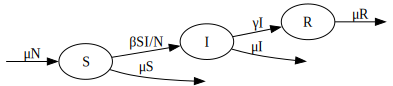

In [2]:
dot = Digraph()

dot.body.extend(['rankdir=LR'])

states=['S', 'I', 'R']

for s in states:
    dot.node(s)

dot.edge('S', 'I', label='&beta;SI/N')
dot.edge('I', 'R', label='&gamma;I')

dot.node("bornS", label="", shape='none', height="0", width="0")
dot.edge('bornS', 'S', label="&mu;N")

dot.node("deadS", label="", shape="none", height="0", width="0")
dot.edge('S', 'deadS', label="&mu;S")

dot.node("deadI", label="", shape="none", height="0", width="0")
dot.edge('I', 'deadI', label="&mu;I")

dot.node("deadR", label="", shape="none", height="0", width="0")
dot.edge('R', 'deadR', label="&mu;R")

dot

### Correlated reaction

Now we introduce case where we have correlated transitions.
For instance, if we wish to track the cumulative infecteds, every time an infection occurs as well as transporting S to I, the cumulative inf increments by 1.
We indicate this by colouring the arrows. Only 1 rate need be specified.

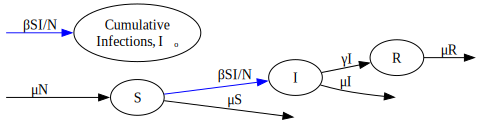

In [3]:
dot = Digraph()

dot.body.extend(['rankdir=LR'])

states=['S', 'I', 'R']

for s in states:
    dot.node(s)

dot.edge('S', 'I', label='&beta;SI/N', color="blue")
dot.edge('I', 'R', label='&gamma;I')

dot.node("bornS", label="", shape="none", height="0", width="0")
dot.edge('bornS', 'S', label="&mu;N")

dot.node("deadS", label="", shape="none", height="0", width="0")
dot.edge('S', 'deadS', label="&mu;S")

dot.node("deadI", label="", shape="none", height="0", width="0")
dot.edge('I', 'deadI', label="&mu;I")

dot.node("deadR", label="", shape="none", height="0", width="0")
dot.edge('R', 'deadR', label="&mu;R")

dot.node("It", label="", shape="none", height="0", width="0")
dot.edge('It', 'Cumulative\nInfections, Iₜₒₜ', label='&beta;SI/N', color="blue")

dot

### Non unitary transitions

Final feature we should account for is magnitude of transitions.
Whilst models tracking humans involve plus or minus one there are example where this isn't the case.
This is common in chemical systems, if we were tracking populations of H2 O2 and H2O in the synthesis of water, then one reaction results in population changes: H2: -2, O2: -1, H2O: +2.
In our case, let's say we want to track the net cost of the epidemic.
If each infection costs C pounds then we need this.

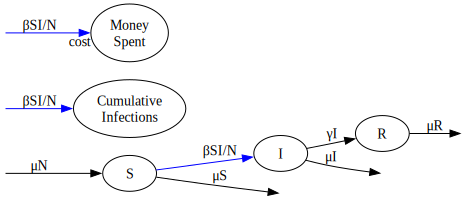

In [4]:
from graphviz import Digraph
import dot2tex


dot = Digraph()

dot.body.extend(['rankdir=LR'])

states=['S', 'I', 'R']

for s in states:
    dot.node(s)

dot.edge('S', 'I', label='&beta;SI/N', color="blue")
dot.edge('I', 'R', label='&gamma;I')

dot.node("bornS", label="", shape="none", height="0", width="0")
dot.edge('bornS', 'S', label="&mu;N")

dot.node("deadS", label="", shape="none", height="0", width="0")
dot.edge('S', 'deadS', label="&mu;S")

dot.node("deadI", label="", shape="none", height="0", width="0")
dot.edge('I', 'deadI', label="&mu;I")

dot.node("deadR", label="", shape="none", height="0", width="0")
dot.edge('R', 'deadR', label="&mu;R")

dot.node("It", label="", shape="none", height="0", width="0")
dot.edge('It', 'Cumulative\nInfections', label='&beta;SI/N', color="blue")

dot.node("cost", label="", shape="none", height="0", width="0")
dot.edge('cost', 'Money\nSpent', label='&beta;SI/N', color="blue", headlabel='cost')

dot

## Definition

gathering these features together, the fundamental unit is the Event, which consists of:

1) A rate at which it occurs
2) Constituent Transitions which happen when the event occurs. Each Transition is then concerned by:
    1) Type (between states or birth/death)
    2) Magnitude of change

For example, the infection event has:

- Rate: $\frac{\beta S I}{N}$
    - Transition 1: $I \rightarrow S$, magnitude 1
    - Transition 2: birth rate into $I_{tot}$, magnitude 1
    - Transition 3: birth rate into $Money$, magnitude cost

## Solving these equations

### ODE's

Common to solve either as a deterministic set of Ordinary Differential Equations

$$\begin{aligned}
\frac{\mathrm{d} S}{\mathrm{d} t} &= -\frac{\beta S I}{N} + \mu N - \mu S\\
\frac{\mathrm{d} I}{\mathrm{d} t} &= \frac{\beta S I}{N} - \gamma I - \mu I\\
\frac{\mathrm{d} R}{\mathrm{d} t} &= \gamma I - \mu R\\
\frac{\mathrm{d} I_{\mathrm{tot}}}{\mathrm{d} t} &= \frac{\beta S I}{N}\\
\frac{\mathrm{d} M}{\mathrm{d} t} &= \frac{c \beta S I}{N}
\end{aligned}$$

### Continuous time Markov chains

Or we solve stochastic via...

# Defining with pygom

Depends on if you want to solve ODE's. Indeed PyGOM can be used for non-ode systems.

## Simple SIR

By the book we should do:

In [ ]:
from pygom import Event, Transition, SimulateOde

#TODO: Birth/Death/Between is now obvious from origin/destination

# 1) Infection
## Transition
transition_infection=Transition(origin='S', destination='I', transition_type='T', magnitude='1')
## Event
event_infection=Event(transition_list=[transition_infection],
                      rate='beta*S*I/N')

# 2) Recovery
## Transition
transition_recovery=Transition(origin='I', destination='R', transition_type='T', magnitude='1')
## Event
event_recovery=Event(transition_list=transition_recovery,
                     rate='gamma*I')

# We specify states and parameters
params=['beta', 'gamma', 'N']
states=[('S', (0, None)), ('I', (0, None)), ('R', (0, None))]

model=SimulateOde(state=states, param=params, event=[event_infection, event_recovery])

model.get_ode_eqn()

Matrix([
[          -I*S*beta/N],
[-I*gamma + I*S*beta/N],
[              I*gamma]])

Since it is fairly common to have change $\pm 1$ and only one transition involved in an Event

We can actually get away with:

In [6]:
transition_infection=Transition(origin='S', destination='I', transition_type='T', equation='beta*S*I/N')
transition_recovery=Transition(origin='I', destination='R', transition_type='T', equation='gamma*I')

# We specify states and parameters
params=['beta', 'gamma', 'N']
states=[('S', (0, None)), ('I', (0, None)), ('R', (0, None))]

model=SimulateOde(state=states, param=params, event=[transition_infection, transition_recovery])

model.get_ode_eqn()

Matrix([
[          -I*S*beta/N],
[-I*gamma + I*S*beta/N],
[              I*gamma]])